In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as Lin_Reg, RidgeCV, LassoCV, ElasticNetCV, LogisticRegressionCV, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import scipy as sp
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

from collections import Counter

In [2]:
# Load training and test sets (assumes you have these in current working directory)
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Inspect training set
train.head()

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251,Target
0,1,0.998952,0.174118,0.999211,0.996460,0.133333,0.057143,0.000,0.0,0.0,...,0.0,0.0,0,0.612863,0.026812,0.522,0.217791,0.233629,0.540962,0.901355
1,2,0.999445,0.174118,0.999329,0.997079,0.133333,0.000000,0.000,0.0,0.0,...,0.0,0.0,0,0.688941,0.075030,0.704,0.246119,0.143860,0.525384,0.913550
2,3,0.998759,0.000000,0.997260,0.996325,0.000000,0.085714,0.125,0.0,0.0,...,0.0,0.0,0,0.156863,0.436279,0.000,0.119091,0.162869,0.361124,0.884824
3,4,0.999619,0.174118,0.997969,0.997321,0.266667,0.057143,0.125,0.0,0.0,...,0.0,0.0,0,0.709647,0.075472,0.513,0.392743,0.377302,0.613776,0.977236
4,5,0.998278,0.174118,0.998427,0.996269,0.200000,0.000000,0.000,0.0,0.0,...,0.0,0.0,0,0.364235,0.041818,0.200,0.096297,0.166459,0.408322,0.921138


In [4]:
train.describe()

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251,Target
count,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,...,5331.000000,5331.000000,5331.0,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000,5331.000000
mean,2666.000000,0.998506,0.142550,0.998887,0.996074,0.099018,0.040598,0.028137,0.013060,0.050136,...,0.005346,0.000563,0.0,0.522928,0.078381,0.434711,0.222165,0.154182,0.521247,0.919657
std,1539.071473,0.012047,0.064343,0.010696,0.015199,0.106834,0.077767,0.074117,0.053347,0.100559,...,0.054956,0.018747,0.0,0.176868,0.087822,0.258655,0.102157,0.107699,0.095065,0.027995
min,1.000000,0.281689,0.000000,0.278493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000110,0.000000,0.000000,0.000000,0.159137,0.845348
25%,1333.500000,0.998859,0.164706,0.998435,0.996382,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.470588,0.026702,0.267000,0.150607,0.082090,0.461988,0.903749
50%,2666.000000,0.999577,0.167059,0.999583,0.996741,0.066667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.562353,0.042039,0.474000,0.205960,0.135370,0.523780,0.912556
75%,3998.500000,0.999956,0.174118,0.999863,0.997143,0.133333,0.057143,0.000000,0.000000,0.045455,...,0.000000,0.000000,0.0,0.641098,0.091802,0.632000,0.271628,0.209626,0.579569,0.926694
max,5331.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.909091,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.995914,1.000000,1.000000,1.000000


In [5]:
# Inspect test set
test.head()

,Id,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,...,Feat 242,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251
0,1,0.999849,0.174118,0.999819,0.997841,0.133333,0.2,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.728471,0.054397,0.649,0.416164,0.053998,0.667391
1,2,0.999958,0.164706,1.000000,0.996741,0.066667,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.497255,0.037736,0.375,0.165514,0.101973,0.506650
2,3,0.999666,0.174118,0.999479,0.997376,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.688941,0.019309,1.000,0.192069,0.120700,0.498784
3,4,0.999735,0.174118,0.999655,0.997173,0.133333,0.0,0.0,0.0,0.363636,...,0.0,0.0,0.0,0,0.654118,0.019089,0.333,0.451252,0.164180,0.774466
4,5,0.999806,0.164706,0.999551,0.997234,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0,0.627451,0.160433,0.882,0.147407,0.000000,0.481240


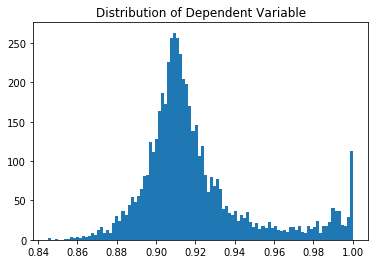

In [6]:
# Explore distribution of target
plt.hist(train['Target'], bins = 100)
plt.title("Distribution of Dependent Variable")
plt.show()

In [7]:
# Split training set into X and y (removing first column containing IDs)
X_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]

In [8]:
# Define function to compute RMSE
def scoreRMSE(predictor, X, true_y):
    predictions = predictor.predict(X)
    return np.sqrt(mean_squared_error(predictions, true_y))

In [9]:
# Fit unregularized linear regression and see RMSE on training set
linReg = Lin_Reg()
linReg.fit(X_train, y_train)

print "Training RMSE: ", scoreRMSE(linReg, X_train, y_train)

Training RMSE:  0.02635316898374967


In [10]:
# Remove first column to make predictions
X_test = test.iloc[:, 1:]
X_test.head()

,Feat 1,Feat 2,Feat 3,Feat 4,Feat 5,Feat 6,Feat 7,Feat 8,Feat 9,Feat 10,...,Feat 242,Feat 243,Feat 244,Feat 245,Feat 246,Feat 247,Feat 248,Feat 249,Feat 250,Feat 251
0,0.999849,0.174118,0.999819,0.997841,0.133333,0.2,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.728471,0.054397,0.649,0.416164,0.053998,0.667391
1,0.999958,0.164706,1.000000,0.996741,0.066667,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.497255,0.037736,0.375,0.165514,0.101973,0.506650
2,0.999666,0.174118,0.999479,0.997376,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.688941,0.019309,1.000,0.192069,0.120700,0.498784
3,0.999735,0.174118,0.999655,0.997173,0.133333,0.0,0.0,0.0,0.363636,0.166667,...,0.0,0.0,0.0,0,0.654118,0.019089,0.333,0.451252,0.164180,0.774466
4,0.999806,0.164706,0.999551,0.997234,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0,0.627451,0.160433,0.882,0.147407,0.000000,0.481240


In [11]:
# Make predictions using linear regression model fitted above
predictions = linReg.predict(X_test)

In [12]:
# Format predictions to be compatible with Kaggle upload
sample_submission = pd.DataFrame(data=predictions, columns=['Predicted'])
sample_submission.insert(0, "Id", range(1, 1 + X_test.shape[0]))
sample_submission['Id'] = sample_submission['Id'].astype(str)
sample_submission.head()

,Id,Predicted
0,1,0.934618
1,2,0.925092
2,3,0.922482
3,4,0.934109
4,5,0.926750


In [13]:
# Save predictions to .csv file for upload to Kaggle
sample_submission.to_csv("sample_submission.csv", index=False)

In [14]:
def train_val_test_split(train, train_size=0.6, val=0.2):
    train_set, test_val_set = train_test_split(train.drop('Id', axis=1), test_size=1-train_size)
    test_set, val_set = train_test_split(test_val_set, test_size=float(val)/(1-train_size))
    train_set_X = train_set.drop(['Target'], axis=1)
    train_set_Y = train_set['Target']
    val_set_X = val_set.drop(['Target'], axis=1)
    val_set_Y = val_set['Target']
    test_set_X = test_set.drop(['Target'], axis=1)
    test_set_Y = test_set['Target']
    return train_set_X, train_set_Y, val_set_X, val_set_Y, test_set_X, test_set_Y
train_set_X, train_set_Y, val_set_X, val_set_Y, test_set_X, test_set_Y = train_val_test_split(train)

In [15]:
linReg = Lin_Reg()
linReg.fit(train_set_X, train_set_Y)
print "Training RMSE: ", scoreRMSE(linReg, train_set_X, train_set_Y)
print "Validation RMSE: ", scoreRMSE(linReg, val_set_X, val_set_Y)

Training RMSE:  0.026075080531068776
Validation RMSE:  704814574.5122484


In [16]:
# Basis Functions
def apply_basis(train_set, funcs):
    train_set = train_set.copy()
    basis_train = pd.DataFrame(train_set)
    for column in train_set.columns:
        if column == 'Target' or column == 'Id':
            continue
        for i in range(0,len(funcs)):
            func = np.vectorize(funcs[i])
            basis_train[column + "_func_" + str(i)] = func(train_set[column])
    return basis_train

In [17]:
poly_funcs = [lambda x: x ** i for i in range(2,9)]
basis_train = apply_basis(train, poly_funcs)

In [18]:
train_set_X, train_set_Y, val_set_X, val_set_Y, test_set_X, test_set_Y = train_val_test_split(basis_train)

In [19]:
# Linear Regression with Polynomial Basis Function (no regularization)
linReg = Lin_Reg()
linReg.fit(train_set_X, train_set_Y)
print "Training RMSE: ", scoreRMSE(linReg, train_set_X, train_set_Y)
print "Validation RMSE: ", scoreRMSE(linReg, val_set_X, val_set_Y)

Training RMSE:  0.024910018993758335
Validation RMSE:  163220359236.0354


In [20]:
# Linear Regression with Lasso Regularization + Polynomial Basis Function
lasso = LassoCV()
lasso.fit(train_set_X, train_set_Y)
print "Training RMSE: ", scoreRMSE(lasso, train_set_X, train_set_Y)
print "Validation RMSE: ", scoreRMSE(lasso, val_set_X, val_set_Y)

Training RMSE:  0.02716676083314193
Validation RMSE:  0.02694123722925261


In [47]:
train_set_X = train_set_X.iloc[:,lasso.coef_ > 0]
val_set_X = val_set_X.iloc[:,lasso.coef_ > 0]

In [48]:
# Linear Regression with Ridge Regularization + Polynomial Basis Function
ridge = RidgeCV()
ridge.fit(train_set_X, train_set_Y)
print "Training RMSE: ", scoreRMSE(ridge, train_set_X, train_set_Y)
print "Validation RMSE: ", scoreRMSE(ridge, val_set_X, val_set_Y)

Training RMSE:  0.027160342868769286
Validation RMSE:  0.026901000890898634


In [22]:
# Random Forest Regression + Polynomial Basis Function
forest = RandomForestRegressor()
forest.fit(train_set_X, train_set_Y)
print "Training RMSE: ", scoreRMSE(forest, train_set_X, train_set_Y)
print "Validation RMSE: ", scoreRMSE(forest, val_set_X, val_set_Y)

Training RMSE:  0.011855401143266862
Validation RMSE:  0.028467701113098286


In [23]:
# Elastic Net Regression + Polynomial Basis Function
elastic = ElasticNetCV()
elastic.fit(train_set_X, train_set_Y)
print "Training RMSE: ", scoreRMSE(elastic, train_set_X, train_set_Y)
print "Validation RMSE: ", scoreRMSE(elastic, val_set_X, val_set_Y)

Training RMSE:  0.027118253360541612
Validation RMSE:  0.02729488209188385


In [53]:
def to_kaggle(model, test):
    df = pd.DataFrame()
    df['Id'] = test['Id']
    df['Predicted'] = model.predict(test.drop('Id', axis=1))
    return df

In [54]:
final_lasso = LassoCV()
final_lasso.fit(apply_basis(train, poly_funcs).drop(['Id','Target'], axis=1), y_train)
kaggle_lasso = to_kaggle(final_lasso, apply_basis(test, poly_funcs))

In [55]:
apply_basis(train, poly_funcs).iloc[:,final_lasso.coef_ > 0]

,Feat 5,Feat 12,Feat 38,Feat 58,Feat 86,Feat 96,Feat 118,Feat 119,Feat 122,Feat 126,...,Feat 213,Feat 214,Feat 215,Feat 231,Feat 232,Feat 245,Feat 247,Feat 248,Feat 250,Feat 96_func_5
0,0.133333,0.096154,0.0,0.00,0,0,0.0,0.0,0,0.133333,...,0.0,0.000000,0.0,0.0,0.2,0,0.026812,0.522,0.233629,0
1,0.133333,0.153846,0.0,0.00,0,0,0.0,0.0,0,0.133333,...,0.0,0.166667,0.0,0.0,0.0,0,0.075030,0.704,0.143860,0
2,0.000000,0.000000,0.0,0.00,0,0,0.0,0.0,0,0.000000,...,0.0,0.000000,0.0,0.0,0.2,0,0.436279,0.000,0.162869,0
3,0.266667,0.153846,0.0,0.25,0,0,0.0,0.0,0,0.266667,...,0.0,0.000000,0.0,0.0,0.0,0,0.075472,0.513,0.377302,0
4,0.200000,0.000000,0.0,0.00,0,0,0.0,0.0,0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0,0.041818,0.200,0.166459,0
5,0.000000,0.115385,0.0,0.00,0,0,0.0,0.0,0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0,0.030564,0.563,0.116674,0
6,0.066667,0.076923,0.0,0.00,0,0,0.0,0.0,0,0.066667,...,0.0,0.000000,0.0,0.0,0.0,0,0.019309,0.474,0.106561,0
7,0.000000,0.019231,0.0,0.00,0,0,0.0,0.0,0,0.000000,...,0.0,0.166667,0.5,0.0,0.0,0,0.062783,0.556,0.000000,0
8,0.000000,0.096154,0.0,0.00,0,0,0.0,0.0,0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0,0.074810,0.462,0.000000,0
9,0.333333,0.000000,0.0,0.00,0,0,0.0,0.0,0,0.333333,...,0.0,0.000000,0.0,0.0,0.0,0,0.215271,0.069,0.174293,0


In [26]:
with open('submission_lasso.csv', 'w') as out:
    out.write(kaggle_lasso.to_csv(index=False))

In [27]:
final_ridge = RidgeCV()
final_ridge.fit(apply_basis(train, poly_funcs).drop(['Id','Target'], axis=1), y_train)
kaggle_ridge = to_kaggle(final_ridge, apply_basis(test, poly_funcs))

In [28]:
with open('submission_ridge.csv', 'w') as out:
    out.write(kaggle_ridge.to_csv(index=False))

In [29]:
final_elastic = ElasticNetCV()
final_elastic.fit(apply_basis(train, poly_funcs).drop(['Id','Target'], axis=1), y_train)
kaggle_elastic = to_kaggle(final_elastic, apply_basis(test, poly_funcs))

In [30]:
with open('submission_elastic.csv', 'w') as out:
    out.write(kaggle_elastic.to_csv(index=False))

In [31]:
final_forest = RandomForestRegressor()
final_forest.fit(apply_basis(train, poly_funcs).drop(['Id','Target'], axis=1), y_train)
kaggle_forest = to_kaggle(final_forest, apply_basis(test, poly_funcs))

In [32]:
with open('submission_forest.csv', 'w') as out:
    out.write(kaggle_forest.to_csv(index=False))

In [33]:
def eval_model(model):
#     clf = model()
    model.fit(train_set_X, train_set_Y)
    print "Training RMSE: ", scoreRMSE(model, train_set_X, train_set_Y)
    print "Validation RMSE: ", scoreRMSE(model, val_set_X, val_set_Y)

In [58]:
final_lasso = LassoCV()
final_lasso.fit(apply_basis(train, poly_funcs).drop(['Id','Target'], axis=1), y_train)
kaggle_lasso = to_kaggle(final_lasso, apply_basis(test, poly_funcs))

In [ ]:
with open('submission_lasso.csv', 'w') as out:
    out.write(kaggle_lasso.to_csv(index=False))

In [42]:
import xgboost as xgb

# clf = RandomForestRegressor(n_estimators=25)

# clf.fit(train_set_X, train_set_Y)

print("Train a XGBoost model")
params = {"objective": "reg:linear",
          "eta": 0.3,
          "max_depth": 5,
          "min_child_weight": 3,
          "silent": 1,
          "subsample": 0.7,
          "colsample_bytree": 0.7,
          "seed": 1}
num_trees=250
gbm = xgb.train(params, xgb.DMatrix(apply_basis(train, poly_funcs).drop(['Id','Target'], axis=1), y_train), num_trees)

print("Make predictions on the test set")
test_probs = (gbm.predict(xgb.DMatrix(apply_basis(test, poly_funcs).drop('Id', axis=1))))

result = pd.DataFrame({'id': test.index + 1})
result['Predicted'] = test_probs
result.to_csv('XGBoost.csv', index=False, sep=',')

Train a XGBoost model
Make predictions on the test set


In [43]:
from xgboost import XGBRegressor
# Elastic Net Regression + Polynomial Basis Function
elastic = XGBRegressor()
elastic.fit(train_set_X, train_set_Y)
print "Training RMSE: ", scoreRMSE(elastic, train_set_X, train_set_Y)
print "Validation RMSE: ", scoreRMSE(elastic, val_set_X, val_set_Y)

Training RMSE:  0.024559945667134025
Validation RMSE:  0.027071371695554923


In [61]:
from xgboost import XGBRegressor

final_xgb = XGBRegressor()
final_xgb.fit(apply_basis(train, poly_funcs).iloc[:,final_lasso.coef_ > 0], y_train)
kaggle_xgb = to_kaggle(final_xgb, apply_basis(test, poly_funcs).iloc[:,final_lasso.coef_ > 0])

KeyError: 'Id'

In [ ]:
with open('submission_XGB.csv', 'w') as out:
    out.write(kaggle_xgb.to_csv(index=False))